In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import geopandas as gp
from datetime import datetime

In [2]:
aus_poas = gp.read_file('aus_poas.shp')
#文件来自https://spatialvision.com.au/blog-open-source-spatial-geopandas-part-1/

In [3]:
aus_poas.head()

,POA_NAME,code,state,geometry
0,6000,6000,None,"POLYGON ((115.86782 -31.95340, 115.86782 -31.9..."
1,6003,6003,None,"MULTIPOLYGON (((115.85039 -31.94570, 115.85065..."
2,6004,6004,None,"POLYGON ((115.86782 -31.95340, 115.86781 -31.9..."
3,6005,6005,None,"POLYGON ((115.84809 -31.93646, 115.84809 -31.9..."
4,6006,6006,None,"POLYGON ((115.84641 -31.92420, 115.84635 -31.9..."


In [154]:
def plot_australia():
    #拿到数据  google postcode 显示出来
    #红的中间
    

    aus_map = aus_poas.plot()
    #澳洲地图
    plt.xlabel('Longitude',fontsize = 15)
    plt.ylabel('Latitude',fontsize = 15)
    
    nsw = aus_poas.query('code >= 2000 & code <= 2999')
    nsw_map = nsw.plot(ax=aus_map,color='green')
    #nsw地图

    around_centennial_park = aus_poas.query('code >= 2000 & code <= 2150')
    around_centennial_park.map = around_centennial_park.plot(ax=nsw_map,color='red')
    #centennial_park 附近地图 红

    return around_centennial_park.map

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

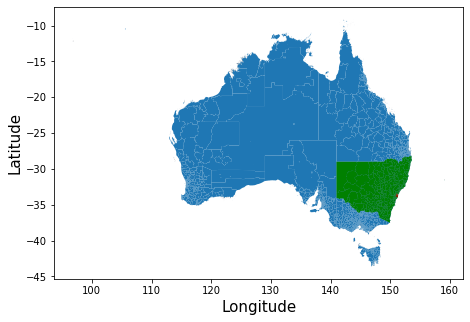

In [155]:
plot_australia()

Text(80.6786421531983, 0.5, 'Latitude')

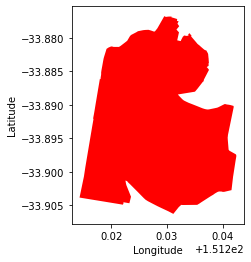

In [5]:
#c_p = c_p.to_crs({'init': 'epsg:4508'})
#地图的标准
#地图更正常

#centennial_park 地形
centennial_park = aus_poas.query('code == 2021')
centennial_park.plot(color='red')

plt.xlabel('Longitude')
plt.ylabel("Latitude")

<AxesSubplot:>

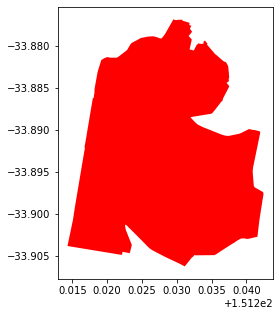

In [159]:
aus_poas.query('code == 2021').plot(color = 'red')
#forppt

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [4]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 5)

saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [5]:
os.path.isfile("rainfall.csv")
filepath = 'rainfall.csv'
#print("load form the file")

centennial_park_rainfall = pd.read_csv(filepath)
#print("done")
#导入数据


In [8]:
#显示所有列
#pd.set_option('display.max_columns', None)
#显示所有行
#pd.set_option('display.max_rows', None)
#不用

In [7]:
centennial_park_rainfall.head(8)

,Product code,Bureau of Meteorology station number,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality
0,IDCJAC0009,66160,1900,1,1,NaN,NaN,NaN
1,IDCJAC0009,66160,1900,1,2,NaN,NaN,NaN
2,IDCJAC0009,66160,1900,1,3,NaN,NaN,NaN
3,IDCJAC0009,66160,1900,1,4,NaN,NaN,NaN
4,IDCJAC0009,66160,1900,1,5,NaN,NaN,NaN
5,IDCJAC0009,66160,1900,1,6,NaN,NaN,NaN
6,IDCJAC0009,66160,1900,1,7,NaN,NaN,NaN
7,IDCJAC0009,66160,1900,1,8,NaN,NaN,NaN


In [163]:
centennial_park_rainfall.columns

Index(['Product code', 'Bureau of Meteorology station number', 'Year', 'Month',
       'Day', 'Rainfall amount (millimetres)',
       'Period over which rainfall was measured (days)', 'Quality'],
      dtype='object')

In [8]:
#合并日月年
#+下一条
centennial_park_rainfall["Date"] = centennial_park_rainfall['Year'].astype(str) + ('-' + centennial_park_rainfall['Month'].astype(str) ) + ('-' + centennial_park_rainfall['Day'].astype(str) )

#去掉无用
rainfall_data = centennial_park_rainfall[['Date','Rainfall amount (millimetres)']]


#日期 to index
#penalty_data3.set_index("Date")
centennial_park_rainfall.index = pd.DatetimeIndex(rainfall_data['Date'])

del rainfall_data['Date']

In [9]:
#合并日月年
#+下一条
centennial_park_rainfall["Date"] = centennial_park_rainfall['Year'].astype(str) + ('-' + centennial_park_rainfall['Month'].astype(str) ) + ('-' + centennial_park_rainfall['Day'].astype(str) )

#去掉无用
rainfall_data = centennial_park_rainfall[['Date','Rainfall amount (millimetres)']]


#日期 to index
centennial_park_rainfall.index = pd.DatetimeIndex(rainfall_data['Date'])

del rainfall_data['Date']
#不知道为什么 need跑两次

In [10]:
#去掉未开张
rainfall_data = rainfall_data.loc['1900-6':'2021-6']
rainfall_data
#rainfall_data.T
#90度

,Rainfall amount (millimetres)
Date,
1900-06-01,0.0
1900-06-02,0.0
1900-06-03,0.0
1900-06-04,0.0
1900-06-05,0.0
...,...
2021-06-26,0.0
2021-06-27,0.0
2021-06-28,1.2


In [11]:
#索引  单年
penalty_data3_2020 = rainfall_data.loc['2020']
print(penalty_data3_2020)

            Rainfall amount (millimetres)
Date                                     
2020-01-01                            0.0
2020-01-02                            0.0
2020-01-03                            0.0
2020-01-04                            0.0
2020-01-05                            0.0
...                                   ...
2020-12-27                            2.6
2020-12-28                            0.0
2020-12-29                           14.0
2020-12-30                           17.4
2020-12-31                            0.0

[366 rows x 1 columns]


In [12]:
rainfall_data.loc['2020-5'].T

Date,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,...,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31
Rainfall amount (millimetres),13.8,0.0,0.0,0.0,13.8,0.0,0.0,0.0,0.0,0.0,...,21.4,3.3,1.0,0.4,55.2,9.2,0.0,0.0,5.0,0.0


Text(0.5, 0, 'Date')

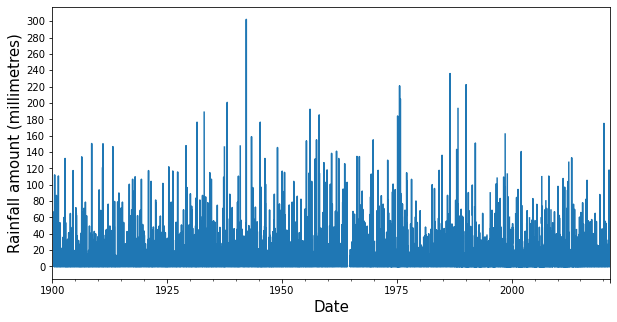

In [169]:
centennial_park_rainfall["Rainfall amount (millimetres)"].plot()

y_ticks = np.arange(0, np.max(centennial_park_rainfall["Rainfall amount (millimetres)"])+1, 20)
#最高降雨量, +1，step 无 end
plt.yticks(y_ticks)

plt.ylabel('Rainfall amount (millimetres)',{'size' : 15})
plt.xlabel('Date',{'size' : 15})
#散点图？
#这个不需要 下面好一点

In [16]:
def scatter_rainfall():
    x = np.arange(len(rainfall_data["Rainfall amount (millimetres)"]))
    y = rainfall_data["Rainfall amount (millimetres)"]

    plt.scatter(x,y,alpha = 0.6)

    plt.ylabel('Rainfall amount (millimetres)',{'size' : 15})
    plt.xlabel('Date',{'size' : 15})

    plt.xticks([0,10000,20000,30000,40000],["1900","1925","1950","1975","2000"])
    y_ticks = np.arange(0, np.max(centennial_park_rainfall["Rainfall amount (millimetres)"])+1, 20)
    plt.yticks(y_ticks)

    return plt.show
    


<function matplotlib.pyplot.show(close=None, block=None)>

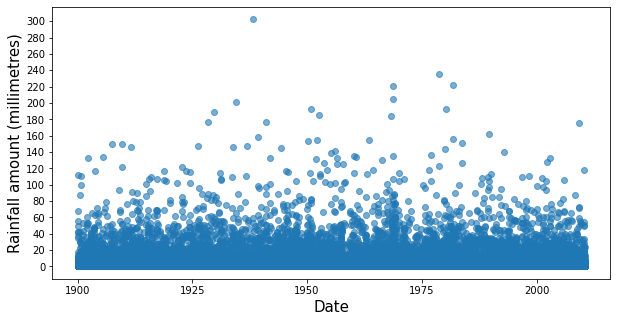

In [17]:
scatter_rainfall()

In [18]:
max_rainfall = np.max(centennial_park_rainfall["Rainfall amount (millimetres)"])
print("单日最高降雨（全数据）")
print(max_rainfall)

c = np.where(rainfall_data["Rainfall amount (millimetres)"] == max_rainfall)
d = centennial_park_rainfall["Date"][c[0][0]]
#print(c[0][0])
print("在这个时间")
print(d)

#全数据

单日最高降雨（全数据）
302.3
在这个时间
1941-10-28


In [36]:
#四季划分 来自https://www.australia.com/en/facts-and-planning/weather-in-australia.html
#12,1,2 夏
#3,4,5 秋
#6,7,8 冬
#9,10,11 春

In [20]:
xiatian_2020 = rainfall_data.loc['2020-1':'2020-2'] 
xiatian_2020_12 =  (rainfall_data.loc['2020-12'])
#print(xiatian_2020,xiatian_2020_12)
#2020 夏
qiutian_2020 = rainfall_data.loc['2020-3':'2020-5']
#2020 秋
dongtian_2020 = rainfall_data.loc['2020-6':'2020-8']
#2020 冬
chuntian_2020 = rainfall_data.loc['2020-9':'2020-11']
#2020 春

In [21]:
a = np.sum(qiutian_2020)
#秋天总降水
print(a[0])
#[0] 数据 nomi

365.3


In [22]:
datas= [np.sum(chuntian_2020)[0], np.sum(xiatian_2020)[0] + np.sum(xiatian_2020_12)[0], np.sum(qiutian_2020)[0], np.sum(dongtian_2020)[0]]
print(datas)

[169.1, 607.6000000000001, 365.3, 318.8]


In [35]:
def pie_seasons(labels,datas):
    
    plt.figure(1, figsize=(6,6))
   
    #expl = [0]
   
    colors  = ["blue","green","yellow","orange"]  #设置颜色（循环显示）
    #plt.shadow = True
    # Pie Plot
    # autopct: format of "percent" string;百分数格式
    plt.pie(datas, explode=None, colors=colors, labels=labels, autopct='%1.1f%%',pctdistance=0.8, shadow=True)
    plt.title('2020——seasons', bbox={'facecolor':'0.8', 'pad':5})
    plt.legend(labels,loc = 1)
    plt.show()
    #plt.savefig("pie.jpg")
    plt.close()
 
#四季  饼图

#夏》秋》冬》春

In [38]:
seasons_label   = ['Spr.','Sum.','Aut.','Win.']
#datas  每个季节 总共降水量
datas   = [np.sum(chuntian_2020)[0], np.sum(xiatian_2020)[0] + np.sum(xiatian_2020_12)[0], np.sum(qiutian_2020)[0], np.sum(dongtian_2020)[0]]

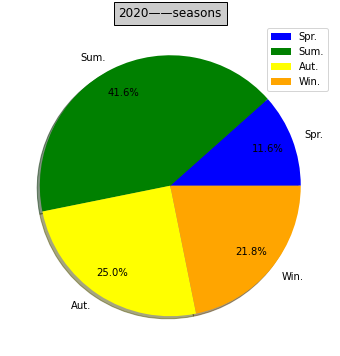

In [39]:
# 全部  降水量 
pie_seasons(seasons_label,datas)

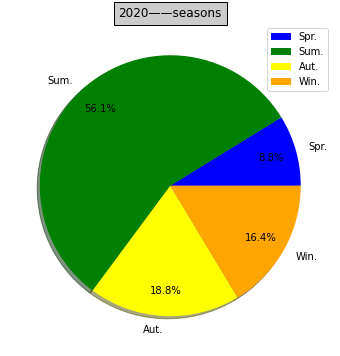

In [40]:
datas   = [np.mean(chuntian_2020)[0], np.mean(xiatian_2020)[0] + np.mean(xiatian_2020_12)[0], np.mean(qiutian_2020)[0], np.mean(dongtian_2020)[0]]
#平均 2020, 降水量
#折线图可能好一点  做12月版的
draw_pie(seasons_label,datas)

In [41]:
def draw_pie_month(label_months,data_months):
    #12个月  版本  饼图
    plt.figure(2, figsize=(6,6))
    colors  = ['cornflowerblue',"blue",'royalblue','forestgreen','green','lime','khaki','yellow','gold','y',"orange",'lightcoral']
    plt.pie(data_months, explode=None, colors=colors, labels=labels_months, autopct='%1.1f%%',pctdistance=0.8, shadow=True)
    plt.title('2020——months', bbox={'facecolor':'0.8', 'pad':5})
    plt.legend(labels_months,loc = 1)
    plt.show()
    plt.close()
 

#12月分  饼图

In [42]:
labels_months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']

In [44]:
#这个调到前面
data_2020_yue =rainfall_data.loc['2020']
#年 分
wenhao2= data_2020_yue.index.month
# 看看索引
wenhao3 = data_2020_yue.resample('M').sum()
# 各个 求和  M为月
#实验  年份分类
wenhao4 = wenhao3['Rainfall amount (millimetres)']
print(wenhao4[8])

wenhao5 = []
for i in range(12):
    wenhao5 = wenhao5 + [wenhao4[i]]

print(wenhao5)

wenhao7 = wenhao5[8:10] + wenhao5[0:8] +wenhao5[10:12]
print(wenhao7)
#改变位置  排序  春夏秋冬




30.400000000000002
[64.80000000000001, 431.5, 179.40000000000003, 37.699999999999996, 148.2, 111.6, 108.9, 98.3, 30.400000000000002, 72.5, 66.19999999999999, 111.29999999999998]
[30.400000000000002, 72.5, 64.80000000000001, 431.5, 179.40000000000003, 37.699999999999996, 148.2, 111.6, 108.9, 98.3, 66.19999999999999, 111.29999999999998]


In [45]:
#求平均 每个月 2020
pingjun3 = data_2020_yue.resample('M').mean()
# 各个 求和  M为月
#实验  年份分类
pj5 = []
for i in range(12):
    pj5 = pj5 + [pingjun3['Rainfall amount (millimetres)'][i]]

pingjun_2020 = pj5[8:10] + pj5[0:8] +pj5[10:12]
#改变位置  排序  春夏秋冬

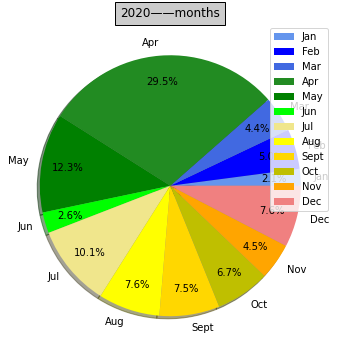

'需要  移开图例 \n颜色  需要改\n'

In [47]:
# 单月索引 
data_months   = wenhao7
# 全部  降水量 
#12月饼图
draw_pie_month(labels_months,data_months)

'''需要  移开图例 
颜色  需要改
'''

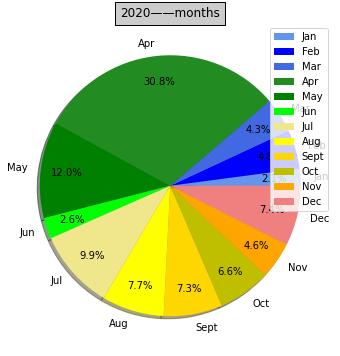

In [48]:
#labels_months   = ['1','2','3','4','5','6','7','8','9','10','11','12']

# 单月索引 

data_months   = pingjun_2020
# 平均  降水量 
#12月饼图
draw_pie_month(labels_months,data_months)


In [ ]:
#全部  数据  平均月  降水
#meanall = penalty_data3.resample('')
#这个和下面 折线图
#饼图看， 野餐 玩耍不出门 
#无雨  出门

In [49]:
#各个月份 降雨量 平均值
#这个没什么意义
max_yue_2020 = data_2020_yue.resample('M').mean()
print(max_yue_2020)


            Rainfall amount (millimetres)
Date                                     
2020-01-31                       2.090323
2020-02-29                      14.879310
2020-03-31                       5.787097
2020-04-30                       1.256667
2020-05-31                       4.780645
2020-06-30                       3.720000
2020-07-31                       3.512903
2020-08-31                       3.170968
2020-09-30                       1.013333
2020-10-31                       2.338710
2020-11-30                       2.206667
2020-12-31                       3.590323


In [50]:
#rain_day = data_2020_yue.resample('D').sum( data_2020_yue >0 )
#print(rain_day)
rain_day = 0
#for i in data_2020_yue:
#    print(data_2020_yue[i][1])
a = data_2020_yue['Rainfall amount (millimetres)']
for i in a:
    if i > 0:
        rain_day += 1
print(rain_day/(len(a)))
#全年下雨天数
#其他method
'''
#c = data_2020_yue.resample('M').sum()
c = (data_2020_yue[data_2020_yue['Rainfall amount (millimetres)'] > 0]).groupby('Date')['Rainfall amount (millimetres)'].count()
print(sum(c))
'''
#print(a)

0.4180327868852459


"\n#c = data_2020_yue.resample('M').sum()\nc = (data_2020_yue[data_2020_yue['Rainfall amount (millimetres)'] > 0]).groupby('Date')['Rainfall amount (millimetres)'].count()\nprint(sum(c))\n"

In [48]:

#全数据下雨天数
rain_day_full = 0
#for i in data_2020_yue:
#    print(data_2020_yue[i][1])
for i in rainfall_data['Rainfall amount (millimetres)']:
    if i > 0:
        rain_day_full += 1
print(rain_day_full/(len(rainfall_data)))

0.32443188241944604


In [71]:
#c = data_2020_yue.resample('M').sum()
#每个月 降雨天数
c = (data_2020_yue[data_2020_yue['Rainfall amount (millimetres)'] > 0]).groupby('Date')['Rainfall amount (millimetres)'].count()
cc = c.resample('M').sum()
#print(c)
#[31,28,31,30,31,30,31，31，30，31，30，31]
#月份 天速
year = 2020
if int(year/4) == float(year/4):
    days_in_month = [31,29,31,30,31,30,31,31,30,31,30,31]
else:
    days_in_month = [31,28,31,30,31,30,31,31,30,31,30,31]

ccc = cc/days_in_month
print(ccc)

Date
2020-01-31    0.387097
2020-02-29    0.551724
2020-03-31    0.548387
2020-04-30    0.300000
2020-05-31    0.419355
2020-06-30    0.566667
2020-07-31    0.451613
2020-08-31    0.258065
2020-09-30    0.266667
2020-10-31    0.387097
2020-11-30    0.333333
2020-12-31    0.548387
Freq: M, Name: Rainfall amount (millimetres), dtype: float64


In [140]:
#每年的  降雨天数
#上面的平均
#2020有几天
#每年降雨大于 50  的天数
#小雨是指24小时内降水量不超过10毫米的雨，
#中雨为10毫米~24.9毫米，
# 大雨为25毫米~49.9毫米，
# 24小时内雨量超过50毫米的称为暴雨
# 超过100毫米的称为大暴雨，
# 超过or == 200毫米的称为特大暴雨。
#这个好像没什么意义？

In [51]:
#大小中暴雨的天数  三雨折线图
#全数据

#暴雨天
baoyutian = (rainfall_data[rainfall_data['Rainfall amount (millimetres)'] > 50]).groupby('Date')['Rainfall amount (millimetres)'].count()
baoyutiana = baoyutian.resample('Y').sum()
baoyutianaa = baoyutiana
print(baoyutianaa)

#大 雨天
dayutian = (rainfall_data[rainfall_data['Rainfall amount (millimetres)'] >= 25]).groupby('Date')['Rainfall amount (millimetres)'].count()
dayutiana = dayutian.resample('Y').sum() 
dayutianaa = dayutiana - baoyutiana
print(dayutianaa)#这个才是

#中 雨天
zhongyutian = (rainfall_data[rainfall_data['Rainfall amount (millimetres)'] >=10 ]).groupby('Date')['Rainfall amount (millimetres)'].count()
zhongyutiana = zhongyutian.resample('Y').sum() 
zhongyutianaa = zhongyutiana - dayutiana
print(zhongyutianaa)#这个才是

#小 雨天
xiaoyutian = (rainfall_data[rainfall_data['Rainfall amount (millimetres)'] > 0]).groupby('Date')['Rainfall amount (millimetres)'].count()
xiaoyutiana = xiaoyutian.resample('Y').sum() 
xiaoyutianaa = xiaoyutiana - zhongyutiana
print(xiaoyutianaa)#这个才是



Date
1900-12-31    4
1901-12-31    3
1902-12-31    5
1903-12-31    1
1904-12-31    2
             ..
2017-12-31    2
2018-12-31    3
2019-12-31    1
2020-12-31    7
2021-12-31    3
Freq: A-DEC, Name: Rainfall amount (millimetres), Length: 122, dtype: int64
Date
1900-12-31     8
1901-12-31     5
1902-12-31     8
1903-12-31    11
1904-12-31    12
              ..
2017-12-31     8
2018-12-31     5
2019-12-31     8
2020-12-31     5
2021-12-31     5
Freq: A-DEC, Name: Rainfall amount (millimetres), Length: 122, dtype: int64
Date
1900-12-31     8
1901-12-31    18
1902-12-31    16
1903-12-31    21
1904-12-31    24
              ..
2017-12-31    22
2018-12-31    26
2019-12-31    26
2020-12-31    28
2021-12-31    15
Freq: A-DEC, Name: Rainfall amount (millimetres), Length: 122, dtype: int64
Date
1900-12-31     68
1901-12-31     99
1902-12-31    120
1903-12-31    116
1904-12-31     95
             ... 
2017-12-31     98
2018-12-31     88
2019-12-31     78
2020-12-31    113
2021-12-31     49
Freq

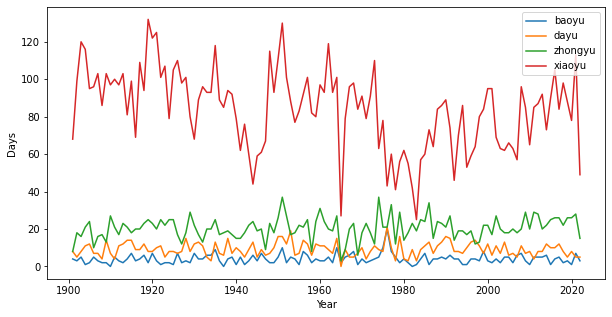

In [52]:
baoyu = plt.plot(baoyutianaa)
dayu = plt.plot(dayutianaa)
zhongyu = plt.plot(zhongyutianaa)
xiaoyu = plt.plot(xiaoyutianaa)
plt.xlabel('Year')
plt.ylabel("Days")
tuli = ['baoyu','dayu','zhongyu','xiaoyu']
plt.legend(tuli,loc = 1)

In [53]:
#全部年份  连续下雨
countall = 0
maxcountall = 0
for i in range(len(rainfall_data['Rainfall amount (millimetres)'])-1):
    if rainfall_data['Rainfall amount (millimetres)'][i] == 0:
        countall = 0
    elif rainfall_data['Rainfall amount (millimetres)'][i] > 0:
        countall = countall +1
        if countall > maxcountall:
            maxcountall = countall
            indexall = i 
            maxindexall = rainfall_data['Rainfall amount (millimetres)'][i]
            #maxindex应该无用
print(indexall,maxcountall,maxindexall)

18324 24 5.8


In [54]:
kaishiall = centennial_park_rainfall['Date'][indexall - maxcountall +1 +(31+28+31+30+31)]
jieweiall = centennial_park_rainfall['Date'][indexall +(31+28+31+30+31)]

print(kaishiall,jieweiall,maxcountall)

1950-7-10 1950-8-2 24


Text(0.5, 0, 'Date')

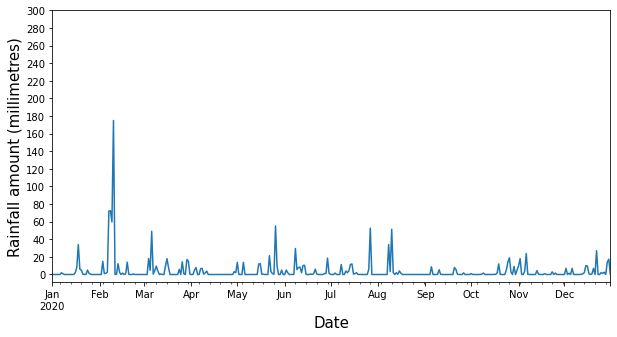

In [62]:
data_2020_yue["Rainfall amount (millimetres)"].plot()

y_ticks = np.arange(0, np.max(centennial_park_rainfall["Rainfall amount (millimetres)"])+1, 20)
#最高降雨量, +1，step 无 end
plt.yticks(y_ticks)

plt.ylabel('Rainfall amount (millimetres)',{'size' : 15})
plt.xlabel('Date',{'size' : 15})
#2020这三个  在全数据之前  循序渐进

In [55]:
#20年份  连续下雨
count = 1
maxcount = 0
for i in range(len(data_2020_yue['Rainfall amount (millimetres)'])-1):
    if (data_2020_yue['Rainfall amount (millimetres)'][i] > 0 ) & (data_2020_yue['Rainfall amount (millimetres)'][i+1] > 0):
        count = count + 1
        #print(count)
        if count > maxcount:
            maxcount = count
            index = i + 1
            maxindex = data_2020_yue['Rainfall amount (millimetres)'][i+1]
    else:
        count = 1   
print(index,maxcount,maxindex)


40 8 175.0


In [60]:
kaishi = centennial_park_rainfall['Date']['2020'][index - maxcount +1]
jiewei = centennial_park_rainfall['Date']['2020'][index]

print(kaishi,jiewei,maxcount)

#开始   结束  持续  天

2020-2-3 2020-2-10 8


<function matplotlib.pyplot.show(close=None, block=None)>

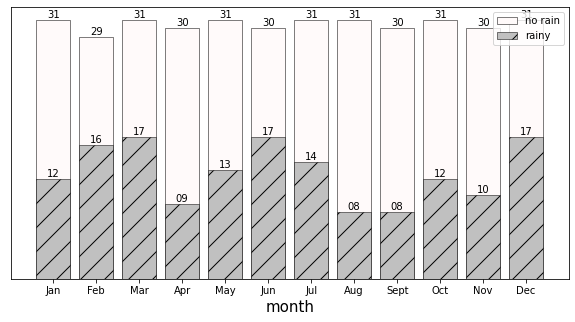

In [78]:
#labels_months  1~12
#days_in_month 31，28，31

otherday = days_in_month - cc
#print(otherday)
plt.bar(range(len(otherday)),days_in_month,label = 'no rain',fc = 'snow',ec='black', ls='-', lw=0.5,tick_label = labels_months)
plt.bar(range(len(otherday)),cc,label = 'rainy',fc = 'silver',ec='k', lw=0.5, hatch='/')
for a,b in zip(np.arange(len(labels_months)),cc):   #柱子上的数字显示
 plt.text(a,b,'%.2d'%b,ha='center',va='bottom',fontsize=10)
for a,b in zip(np.arange(len(labels_months)),days_in_month):   #柱子上的数字显示
 plt.text(a,b,'%.2d'%b,ha='center',va='bottom',fontsize=10)

plt.yticks([])
plt.xlabel("month",fontsize = 15)

plt.legend()
plt.show

Text(0.5, 0, 'Days')

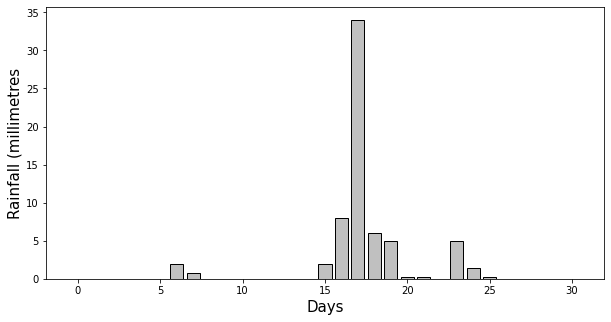

In [94]:
#每个月降雨量  条状  #1月示例
tiaozhuang = data_2020_yue.loc['2020-01']["Rainfall amount (millimetres)"]
plt.bar(range(len(tiaozhuang)),tiaozhuang,fc = 'silver',ec='k')
plt.ylabel("Rainfall (millimetres",fontsize = 15)
plt.xlabel('Days',fontsize =15)

In [96]:
avg_rain_nian = rainfall_data.resample('Y').mean()
#每年降雨量  想要平均
#avg_rain_nian.plot()
#print(avg_rain_nian)

<AxesSubplot:xlabel='Date'>

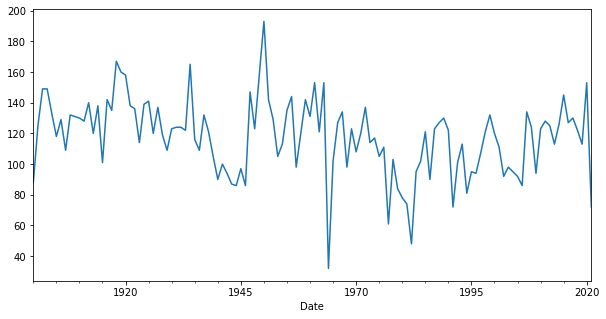

In [97]:
#每年降雨天数
rainday_peryear = (rainfall_data[rainfall_data['Rainfall amount (millimetres)'] > 0]).groupby('Date')['Rainfall amount (millimetres)'].count()
rainday_peryear_all = rainday_peryear.resample('Y').sum()
#print(rainday_peryear_all)
#上面一条365的线   最好能打个阴影
rainday_peryear_all.plot()

([<matplotlib.axis.XTick at 0x7fe0790859a0>,
 [Text(0, 0, '1900'),
  Text(20, 0, '1920'),
  Text(40, 0, '1940'),
  Text(60, 0, '1960'),
  Text(80, 0, '1980'),
  Text(100, 0, '2000'),
  Text(120, 0, '2020')])

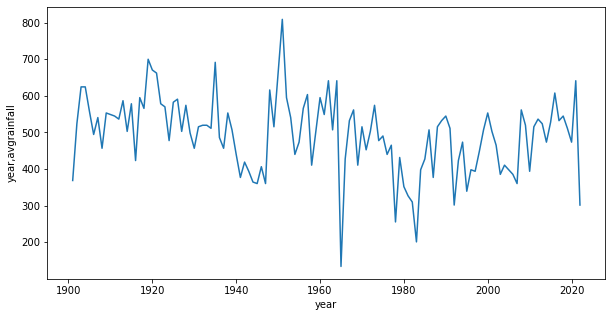

In [120]:
kaka = np.array(avg_rain_nian) * np.array(rainday_peryear_all)
#每个年  平均降雨量
#print(kaka[0])
xkaka = kaka[0]
ykaka = np.arange(1,len(xkaka)+1)
#print(ykaka)
plt.plot(ykaka,xkaka)
plt.ylabel('year,avgrainfall')
plt.xlabel("year")
plt.xticks([0,20,40,60,80,100,120],["1900","1920","1940","1960","1980",'2000','2020'])

In [15]:
wuyu = len(rainfall_data[rainfall_data['Rainfall amount (millimetres)'] == 0])
#not rain
xiaoyu = len(rainfall_data[rainfall_data['Rainfall amount (millimetres)'] < 10]) - wuyu
#light rain
baoyu= len(rainfall_data[rainfall_data['Rainfall amount (millimetres)'] > 50])
#Violen rain
dayu = len(rainfall_data[rainfall_data['Rainfall amount (millimetres)'] >= 25]) - baoyu
#heavy rain
zhongyu = len(rainfall_data[rainfall_data['Rainfall amount (millimetres)'] >= 10]) - baoyu - dayu
#moderate rain

#light rain  #moderate rain  #heavy rain #Violen rain


In [16]:
print(xiaoyu)
print(zhongyu)
print(dayu)
print(baoyu)
#各种雨的次数
#全部数据
typeyu = [xiaoyu,zhongyu,dayu,baoyu]
print(typeyu)
typeyu_lable = ['Light rain', 'Moderate rain', 'Heavy rain','Violen rain']

10243
2500
1117
488
[10243, 2500, 1117, 488]


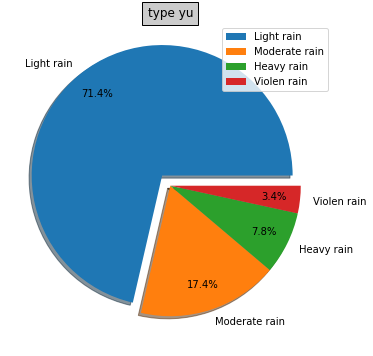

In [21]:
#各种雨 次数的饼图
plt.figure(2, figsize=(6,6))
#colors  = ['cyan','lightskyblue','steelblue','darkblue']
explodes =(0.1,0,0,0)
plt.pie(typeyu, explode=explodes, colors=None, labels=typeyu_lable, autopct='%1.1f%%',pctdistance=0.8, shadow=True)
plt.title('type yu', bbox={'facecolor':'0.8', 'pad':5})
plt.legend(typeyu_lable,loc = 1)
plt.show()
plt.close()
#这是全年

In [129]:
xiaoyushui = np.sum(rainfall_data[rainfall_data['Rainfall amount (millimetres)'] < 10])
#light rain
baoyushui= np.sum(rainfall_data[rainfall_data['Rainfall amount (millimetres)'] > 50])
#Violen rain
dayushui = np.sum(rainfall_data[rainfall_data['Rainfall amount (millimetres)'] >= 25]) - baoyushui
#heavy rain
zhongyushui = np.sum(rainfall_data[rainfall_data['Rainfall amount (millimetres)'] >= 10]) - baoyushui - dayushui
#moderate rain
print(xiaoyushui)
print(zhongyushui)
print(dayushui)
print(baoyushui)
typeyushui = [xiaoyushui[0],zhongyushui[0],dayushui[0],baoyushui[0]]
print(typeyushui)

Rainfall amount (millimetres)    30577.9
dtype: float64
Rainfall amount (millimetres)    39635.3
dtype: float64
Rainfall amount (millimetres)    38674.8
dtype: float64
Rainfall amount (millimetres)    39254.4
dtype: float64
[30577.9, 39635.3, 38674.8, 39254.399999999994]


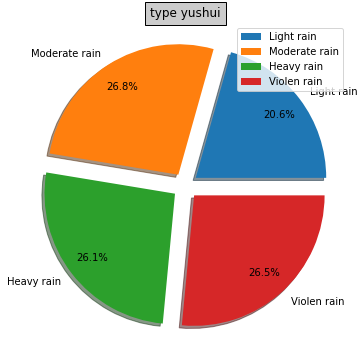

In [130]:
#各种雨type 降水量的饼图
plt.figure(2, figsize=(6,6))
#colors  = ['cyan','lightskyblue','steelblue','darkblue']
explodes =(0.1,0.1,0.1,0.1)
plt.pie(typeyushui, explode=explodes, colors=None, labels=typeyu_lable, autopct='%1.1f%%',pctdistance=0.8, shadow=True)
plt.title('type yushui', bbox={'facecolor':'0.8', 'pad':5})
plt.legend(typeyu_lable,loc = 1)
plt.show()
plt.close()
#好像没什么意义  因为是按照科学家是按照比例来指定界限